Author: Chelsey Macaulay

Class/Section: DSCI 100-003


Summer 2025 Term 1


Due June 23rd, 2025

**Predicting Subscription Status of Game Newsletter based on Player's Characteristics**

**Introduction**

*Background*

A UBC research group within the Department of Computer Science collected data of their Minecraft server to analyse. This group, led by Frank Wood, recorded information regarding each player on the server, including age, gender, experience, first name, and total time spent playing. As this project is quite complex and time-consuming to run, this group wanted to identify if the characteristics of the player's could predict if the player would subscribe to a game-related newsletter. This would help focus recruiting and advertising efforts of the group members. 

*Question* 

In order to help this group, I identified the following question to target and analyse the data with this goal in mind: "Can a player's age and hours played be used to predict their subscription status (if they subscribe to the newsletter) in the data recorded from previous players?" 

*Data Description*

Two datasets were provided, one focused on the player data, and the other regarding each play session. I utilized the player data, which contained 7 variables in total: age, gender, experience, a hashed email, first name, hours played, and subscription status. There were a 196 observations within the data set. A detailed description of each variable is given below, grouped by variable type. 

Character-type Variables
- experience: The ranked experience of a player. Levels include Amateur, Beginner, Pro, Regular, and Veteran
- hashedEmail: A unique identifier for each player, a random sequence of numbers and letters 
- name: The first name of the player
- gender: The gender of the player. The labels included Male, Female, Non-binary, Agender, Two-Spirited, Other, and Prefer Not to Say

Numerical-type Variables
- played_hours: The amount of time each player spent on the server measured in hours
- Age: The age of the players

Logical Variables
- subscribe: The subscription status of each player. The values are either "TRUE" if subscribed, or "FALSE" if not subscribed


**Methods & Results**

*Loading the Data*

Before beginning any exploring of the data or analysis, I first loaded the necessary libraries. Then, I pulled the player data file from Github into my local directory and read in the file in an object to begin exploring the data. I also set the seed for this notebook to have reproducible results.

In [52]:
library(tidyverse)
library(tidymodels)
library(repr)

set.seed(2025)

In [53]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


*Wrangling and Tidying the Data*

Now that the data is loaded in, it must be wrangled into a format that will be easiest to use in the analysis. So, I used the `select` function to keep the variables of subscription status (subscribe), age (Age), and hours played (played_hours). The other variables are not of interest and so can be eliminated from the data set 

As the subscribe variable was read as a "logical variable", I mutated this into a "factor variable" using `mutate` and `as_factor` for ease within the later analysis. 

I filtered the age variable to dismiss the options of "NA" so they would not affect any outcomes and to ensure all values in this variable are numbers using `filter`. I chose to do this as that observation does not help to answer our predictive question, as the age of these people are unknown. 

In [54]:
players_tidy <- players |>
    select(subscribe, Age, played_hours) |>
    mutate(subscribe = as_factor(subscribe)) |>
    filter(!is.na(Age))
players_tidy

subscribe,Age,played_hours
<fct>,<dbl>,<dbl>
TRUE,9,30.3
TRUE,17,3.8
FALSE,17,0.0
TRUE,21,0.7
TRUE,21,0.1
TRUE,17,0.0
TRUE,19,0.0
FALSE,21,0.0
TRUE,17,0.1


*Exploring the Data with Summary Statistics* 

To explore the data, I used `group_by` and `summarize` to calculate the mean age and mean hours played within the data set. From the results below, I can see that the mean age is similar in both classes, which may hinder the accuracy of the classification model. However, the mean_hours for both groups are different, showing that players that are subscribed to the newsletter seem to play more than those who are not. This is beneficial information regarding the player characteristics that are likely to subscribe. I also included the count of each class to see how the two classes are balanced. 

In [55]:
players_summary <- players_tidy |>
    group_by(subscribe) |>
    summarize(mean_age = mean(Age),
              mean_hours = mean(played_hours),
             count = n())
players_summary

subscribe,mean_age,mean_hours,count
<fct>,<dbl>,<dbl>,<int>
FALSE,22.98077,0.5019231,52
TRUE,19.61972,7.8830986,142


*Exploring the Data with Visualizations* 

To explore the data through visualizations, I created two distributions to see the range of ages and hours played within the data, while seeing how subscription status compared to each class (Figure 1 and 2). From Figure 1, I have learned there is a wide range of ages that contribute to the server but a large portion of players are within the range of 20 years old. The subscription class does not seem to deter the wide range of ages. Figure 2 confirms what is shown in the summary statistics - that players that are subscribed tend to play more hours. 

I then created a visualization of age and hours played to explore the relationship between the two predictor variables, shown in Figure 3. It seems there is not much of a relationship between the two, and quite a bit of overlap along the baseline. This may cause issues with classifier accuracy and is something to be aware of. 

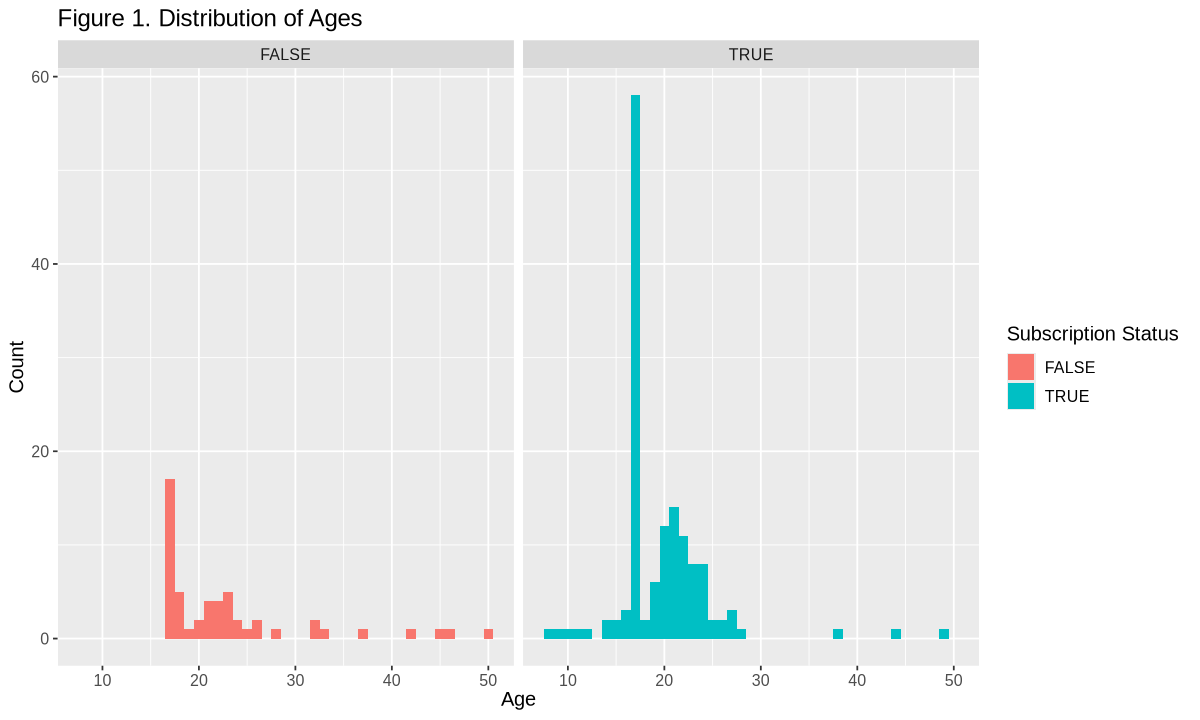

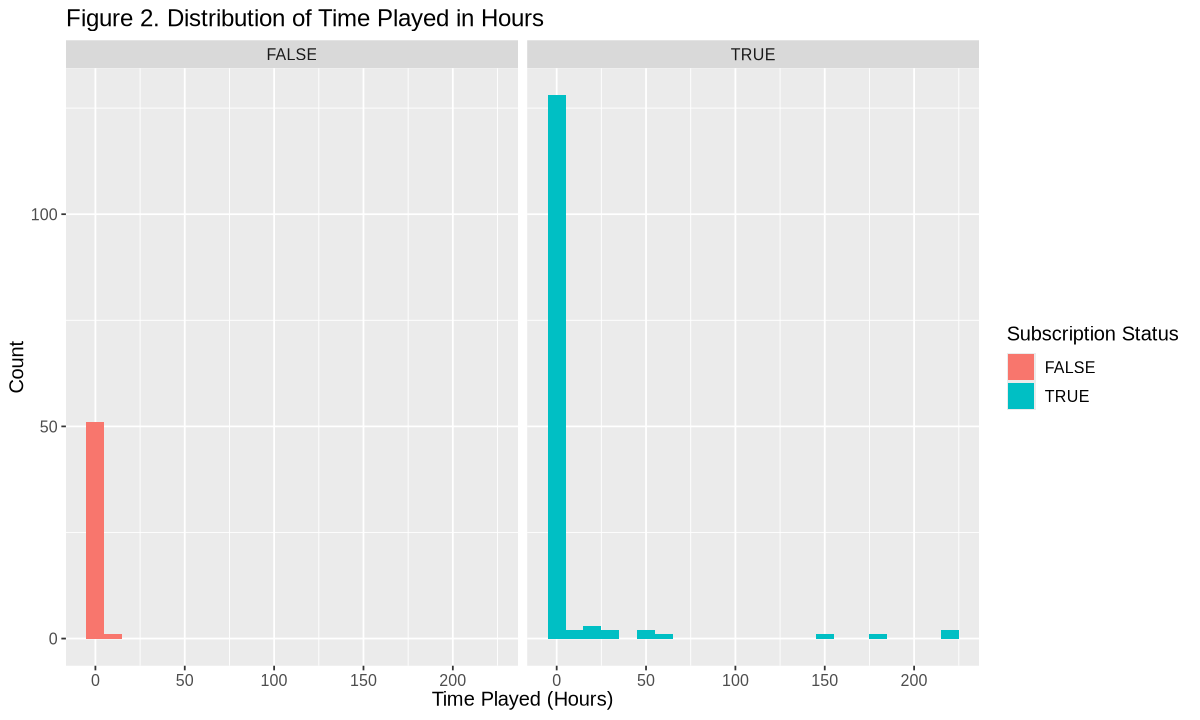

In [56]:
options(repr.plot.height = 6, repr.plot.width = 10)
age_plot <- ggplot(players_tidy, aes(x = Age, fill = subscribe)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Age",
         y = "Count",
         fill = "Subscription Status",
         title = "Figure 1. Distribution of Ages") +
    theme(text = element_text(size = 12)) +
    facet_wrap(vars(subscribe))
age_plot

options(repr.plot.height = 6, repr.plot.width = 10)
hours_plot <- ggplot(players_tidy, aes(x = played_hours, fill = subscribe)) +
    geom_histogram(binwidth = 10) +
    labs(x = "Time Played (Hours)",
         y = "Count",
         fill = "Subscription Status",
         title = "Figure 2. Distribution of Time Played in Hours") +
    theme(text = element_text(size = 12)) +
    facet_wrap(vars(subscribe))
hours_plot

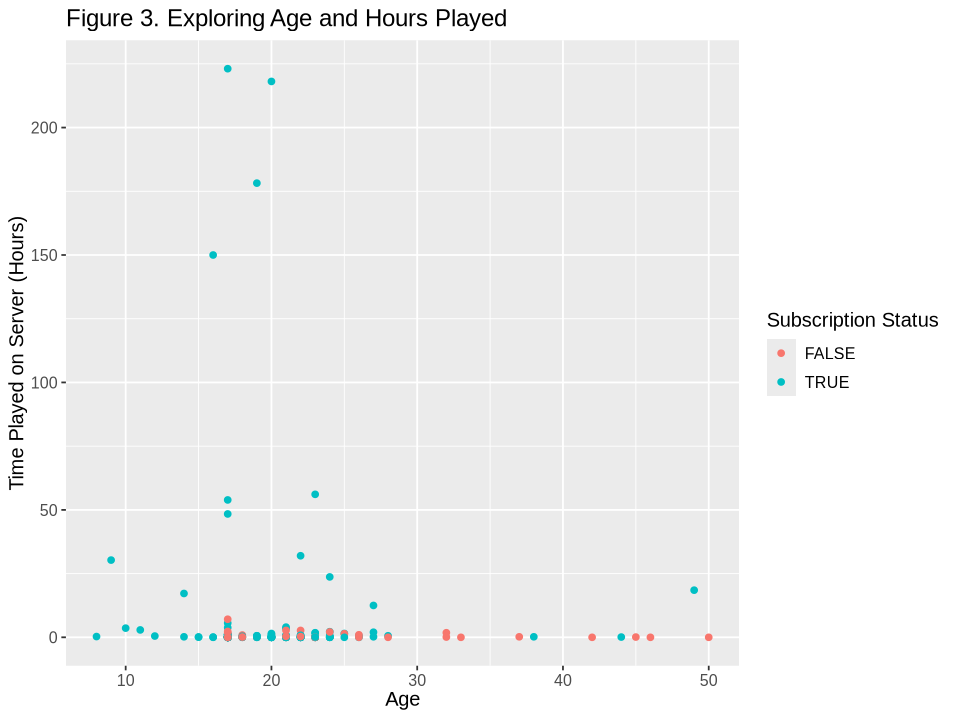

In [57]:
options(repr.plot.height = 6, repr.plot.width = 8)

players_viz <- ggplot(players_tidy, aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point() +
    labs(x = "Age",
         y = "Time Played on Server (Hours)",
         colour = "Subscription Status",
         title = "Figure 3. Exploring Age and Hours Played") +
    theme(text = element_text(size = 12))
players_viz

*Performing the Data Analysis*

The following data analysis is presented in a series of steps, with small descriptions of what will be performed. To answer this predictive question, I used a K-nn classification model. This is an appropriate method as this model can handle the smaller amount of data well and works well for the binary (two-class) classification problem presented here. No assumptions are required of the data as well, so this is another strength of this method. A limitation of the model is that it may not perform well when the classes are imbalanced, which does occur in our case. 

Step 1 - Train/Test Data Splitting 

I set the seed for the data analysis, so the following analysis is reproducible. Then, I split the data set into a training set and testing set by a 70%-30% train-test split. This step will help to evaluate how "good" the model performs. Using `initial_split`, I set the target variable as well. 

In [58]:
players_split <- initial_split(players_tidy, prop = 0.70, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

Step 2 - Recipe and Model-tuning 

I created a recipe to pre-process the data of the training set as K-nn classifiers are sensitive to the scales of the variables. I scaled and centered the predictors to standardize them. Then, I created the k-nn classification model specification with the number of neighbors set to `tune()` as we will test multiple values of K in order to assess the K that will give us the best accuracy. 

After creating the model specification, I assign values of K from 1 to 10 to an object `ks`, then use the `vfold` function to create the 10-fold cross-validation model. Once this is all done, I then use `collect_metrics()` to find the accuracies of each K tested.

In [64]:
players_recipe <- recipe(subscribe ~ ., data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

ks <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

players_vfold <- vfold_cv(players_training, v = 10, strata = subscribe)

knn_accuracy <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = players_vfold, grid = ks) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
knn_accuracy

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5359890,10,0.04067099,Preprocessor1_Model01
2,accuracy,binary,0.5359890,10,0.04067099,Preprocessor1_Model02
3,accuracy,binary,0.6083333,10,0.03619039,Preprocessor1_Model03
4,accuracy,binary,0.5929487,10,0.03156508,Preprocessor1_Model04
5,accuracy,binary,0.6139194,10,0.02735261,Preprocessor1_Model05
6,accuracy,binary,0.6139194,10,0.02735261,Preprocessor1_Model06
7,accuracy,binary,0.5990842,10,0.02824375,Preprocessor1_Model07
8,accuracy,binary,0.5990842,10,0.02824375,Preprocessor1_Model08
9,accuracy,binary,0.5776557,10,0.03087371,Preprocessor1_Model09


Step 3 - Selecting the Optimal K

Now that the accuracies are calculated, I plotted the values of K and the accuracies to determine which value of K has the highest accuracy (Figure 4). From this plot, we can see that $K = 5$ has the max accuracy, so I chose to use $K = 5$ for the final model build. 

As an aside, due to the cross-validation method - every time it is run, the optimal K can change as displayed by the plot below. When I performed my validation, I had $K = 5$

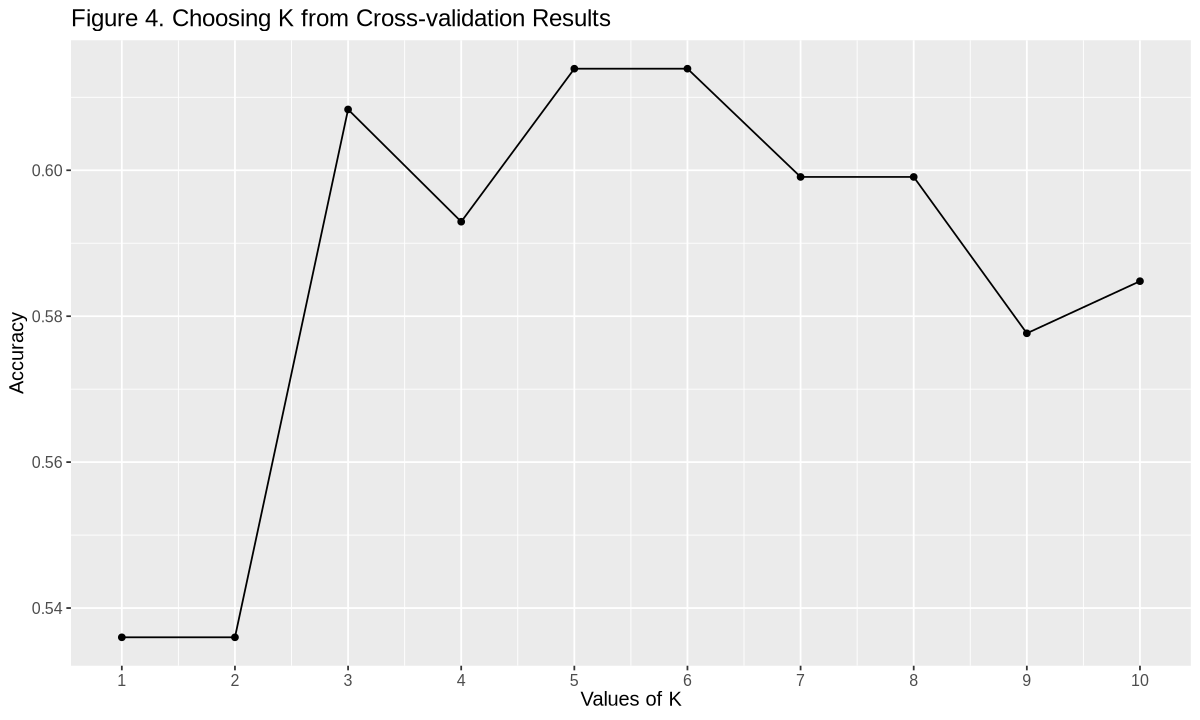

In [65]:
accuracy_plot <- ggplot(knn_accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Values of K",
         y = "Accuracy",
         title = "Figure 4. Choosing K from Cross-validation Results") +
    scale_x_continuous(breaks = 1:10) +
    theme(text = element_text(size = 12))
accuracy_plot

Step 4 - Creating the Final Classification Model

As we have determined $K = 5$ to be the optimal parameter, I then created the final model specification with the found value of $K$. Then, I fit the training set with this final model.

In [61]:
knn_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_final) |>
    fit(data = players_training)

Step 5 - Predictions

With the final model complete, I used it to predict the class on the testing set. I used `bind_cols()` to add these predictions to the testing set data frame. I then found the accuracy of this model on the testing set. To visualize the final analysis, I plotted the age of the player against the hours played by the player and coloured the dots according to the predicted class from the model (Figure 5). From this scatterplot, the classification model shows a scattered grouping of subscription status predictions. Age appears to be a deciding factor, as a trend of higher ages predicted to be false is visible. A cluster of 20-25 year olds with an elevated amount of hours made appears to be the best target demographic for subscription to the newsletter. 

.metric,.estimate
<chr>,<dbl>
accuracy,0.5762712


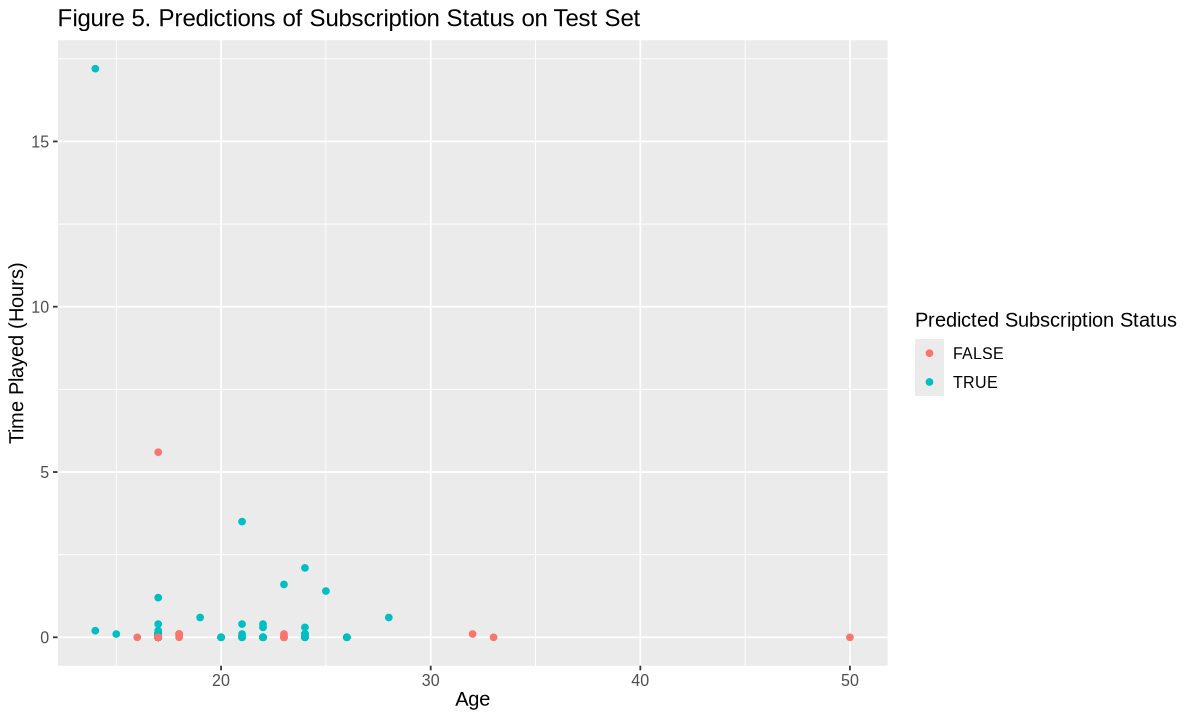

In [62]:
players_predict <- predict(players_fit, players_testing) |>
    bind_cols(players_testing)
# players_predict

options(repr.plot.height = 6, repr.plot.width = 10)
predict_plot <- ggplot(players_predict, aes(x = Age, y = played_hours, colour = .pred_class)) +
        geom_point() +
        labs(x = "Age",
             y = "Time Played (Hours)",
             colour = "Predicted Subscription Status",
             title = "Figure 5. Predictions of Subscription Status on Test Set") +
        theme(text = element_text(size = 12))
predict_plot

players_metrics <- players_predict |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    select(-.estimator)
players_metrics

Step 6 - Evaluating the Model

To evaluate the "goodness" of this model, I created the confusion matrix with `conf_mat` and will label the "TRUE" class as the positive label, for further reference. In the object called `results`, I calculated the precision and recall of this model to evaluate those aspects as well. All calculated values are in percentages. While the accuracy of the model is 57.6%, which is not very good, the precision and recall are much better. A precision of 63% allows moderate confidence that the predicted positive labels are, in fact, positive. In the context of this question we are asking, this shows that the model can decently predict when a player would subscribe to a newsletter and we can *trust* that result. For recall, a result of 75% is also quite good. A high recall shows that if a positive result exists within the data set, then this model is capable of finding it. In the context of this question we are asking, this is a satisfactory result as that if a player has the characteristics of subscribing to the newsletter, then the model will identify them as such.  

In [63]:
players_conf_mat <- conf_mat(players_predict, truth = subscribe, estimate = .pred_class)
players_conf_mat

results <- tibble(accuracy = 0.576 * 100, precision = 27/(16+27) * 100, recall = 27/(9 + 27) * 100)
results

          Truth
Prediction FALSE TRUE
     FALSE     7   16
     TRUE      9   27

accuracy,precision,recall
<dbl>,<dbl>,<dbl>
57.6,62.7907,75


**Discussion**

In summary, the K-nn classification model created through this analysis is capable of predicting the subscription status of players based on age and hours played on the server. Although the accuracy of the model is moderate, the precision and recall previously mentioned are very helpful indicators in the success of the model. For the model, the optimal number of neighbors, $K=5$, was found through a 10-fold cross-validation algorithm. This final result was expected and does ultimately make sense, as both age and hours played are correlated to the amount of time and involvement a player may have to contribute to this server, which can be extrapolated to subscription to the newsletter. The impacts of this result will allow the research group to focus their advertising to the demographic that is most likely to subscribe to the newsletter. For further research, I would ask which other characteristics of players can predict the subscription status with higher accuracy, precision, and recall. 